# Gerardo de Miguel González

# Binary Classification Proof of Concept

## Libraries

In [1]:
#::GMG::Which libraries are there?
list.files(R.home('library'))

[1] "base"         "boot"         "class"        "cluster"      "codetools"   
 [6] "compiler"     "datasets"     "foreign"      "graphics"     "grDevices"   
[11] "grid"         "KernSmooth"   "lattice"      "MASS"         "Matrix"      
[16] "methods"      "mgcv"         "nlme"         "nnet"         "parallel"    
[21] "rpart"        "spatial"      "splines"      "stats"        "stats4"      
[26] "survival"     "tcltk"        "tools"        "translations" "utils"

**::GMG::** Original `stdout`:

```shell
     'base' 'boot' 'class' 'cluster' 'codetools' 'compiler' 'datasets' 'foreign' 'graphics' 'grDevices' 'grid' 'KernSmooth' 'lattice' 'MASS' 'Matrix' 'methods' 'mgcv' 'nlme' 'nnet' 'parallel' 'rpart' 'spatial' 'splines' 'stats' 'stats4' 'survival' 'tcltk' 'tools' 'translations' 'utils' 
```

In [2]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
using_w<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    n<-length(need)
    if(n>0){
        libsmsg<-if(n>2) paste(paste(need[1:(n-1)],collapse=", "),",",sep="") else need[1]
        print(libsmsg)
        if(n>1){
            libsmsg<-paste(libsmsg," and ", need[n],sep="")
        }
        libsmsg<-paste("The following packages could not be found: ",libsmsg,"\n\r\n\rInstall missing packages?",collapse="")
        if(winDialog(type = c("yesno"), libsmsg)=="YES"){       
            install.packages(need)
            lapply(need,require,character.only=TRUE)
        }
    }
}

In [3]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    if(length(need)>0){ 
        install.packages(need)
        lapply(need,require,character.only=TRUE)
    }
}

In [4]:
#::GMG::I'm going to use ... 
# ... mlbench for getting pima indians dataset ...
# https://cran.r-project.org/web/packages/mlbench/index.html
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
# ... caTools for train/test splitting datasets ...
# https://cran.r-project.org/web/packages/caTools/index.html
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
# ... dataPreparation: Automated Data Preparation ...
# https://cran.r-project.org/web/packages/dataPreparation/index.html
# https://cran.r-project.org/web/packages/dataPreparation/vignettes/train_test_prep.html
# ... correlation plot (corrplot) for EDA visualization ...
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://cran.r-project.org/web/packages/corrplot/index.html
# ... Machine Learning in R (most of things I'll need)
# https://cran.r-project.org/web/packages/mlr/index.html
# https://cran.r-project.org/web/packages/mlr/mlr.pdf
#::NOTE::What about tidyverse?
# https://cran.r-project.org/web/packages/tidyverse/index.html
# https://www.tidyverse.org/ 
using('mlbench', 'caTools', 'dataPreparation', 'corrplot', 'mlr')

Loading required package: mlbench
Loading required package: caTools
Loading required package: dataPreparation
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: stringr
Loading required package: Matrix
Loading required package: progress
dataPreparation 0.4.0
Type dataPrepNews() to see new features/changes/bug fixes.
Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: mlr
Loading required package: ParamHelpers


**::GMG::** stdout of installation (first time, a 5 min process!)

```shell
Loading required package: mlbench
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlbench’”Loading required package: caTools
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caTools’”Loading required package: dataPreparation
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘dataPreparation’”Loading required package: corrplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”Loading required package: mlr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlr’”Installing packages into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ellipsis’, ‘rlang’, ‘vctrs’, ‘hms’, ‘fastmatch’, ‘lubridate’, ‘progress’, ‘ParamHelpers’, ‘BBmisc’, ‘parallelMap’

Loading required package: mlbench
Loading required package: caTools
Loading required package: dataPreparation
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: stringr
Loading required package: Matrix
Loading required package: progress
Error: package or namespace load failed for ‘progress’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 0.3.4 is already loaded, but >= 0.4.0 is required
Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: mlr
Loading required package: ParamHelpers
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
```

and yields TRUE, TRUE, **FALSE**, TRUE, TRUE which suggests some *trouble* with `dataPreparation` ([\*]()) ... Besides there's been an **error** on yhe `progress` ([\*](https://cran.r-project.org/web/packages/progress/index.html)) package. In fact, `dataPreparation` depends on that package, among others: R (≥ 3.3.0), lubridate, stringr, Matrix, **progress**.

**::GMG::** There's a problem with [`rlang`](https://cran.r-project.org/web/packages/rlang/index.html) because if I try to [see the installed packages]() I get an error:

```R
> old.packages()

> ERROR while rich displaying an object: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace ‘rlang’ 0.3.4 is already loaded, but >= 0.4.0 is required

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)

[...]
```

In order to fix that I decided to [update the installed packages](https://www.neonscience.org/packages-in-r) which takes *15 minutes*.

```R
# update all available packages
> update.packages(ask = FALSE)

> also installing the dependencies ‘brew’, ‘commonmark’, ‘xml2’, ‘praise’, ‘roxygen2’, ‘testthat’
Error in install.packages(update[instlib == l, "Package"], l, contriburl = contriburl, : unable to install packages
Traceback:

1. update.packages(ask = FALSE)
2. install.packages(update[instlib == l, "Package"], l, contriburl = contriburl, 
 .     method = method, available = available, ..., type = type)
3. stop("unable to install packages")
```

**Another error**. So I'm lost here.

**GMG::** I fix the issue on command line updating the packages

```R
> old.packages()
         Package    LibPath              Installed  Built   ReposVer
boot     "boot"     "/usr/lib/R/library" "1.3-20"   "3.5.0" "1.3-23"
cluster  "cluster"  "/usr/lib/R/library" "2.0.8"    "3.5.3" "2.1.0"
foreign  "foreign"  "/usr/lib/R/library" "0.8-70"   "3.5.0" "0.8-71"
MASS     "MASS"     "/usr/lib/R/library" "7.3-51.1" "3.5.1" "7.3-51.4"
survival "survival" "/usr/lib/R/library" "2.43-3"   "3.5.1" "2.44-1.1"
         Repository
boot     "https://cloud.r-project.org/src/contrib"
cluster  "https://cloud.r-project.org/src/contrib"
foreign  "https://cloud.r-project.org/src/contrib"
MASS     "https://cloud.r-project.org/src/contrib"
survival "https://cloud.r-project.org/src/contrib"

> update.packages()
boot :
 Version 1.3-20 installed in /usr/lib/R/library
 Version 1.3-23 available at https://cloud.r-project.org
Update? (Yes/no/cancel)

[...]

survival :
 Version 2.43-3 installed in /usr/lib/R/library
 Version 2.44-1.1 available at https://cloud.r-project.org
Update? (Yes/no/cancel) yes
Warning in install.packages(update[instlib == l, "Package"], l, contriburl = contriburl,  :
  'lib = "/usr/lib/R/library"' is not writable

Would you like to use a personal library instead? (yes/No/cancel) yes

[...]

** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (survival)

The downloaded source packages are in
        ‘/tmp/RtmpH5XaDg/downloaded_packages’
```

and installing `dataPreparation`:

```R
`> install.packages('dataPreparation')
Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/dataPreparation_0.4.0.tar.gz'
Content type 'application/x-gzip' length 1286671 bytes (1.2 MB)
==================================================
downloaded 1.2 MB

* installing *source* package ‘dataPreparation’ ...
** package ‘dataPreparation’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (dataPreparation)

The downloaded source packages are in
        ‘/tmp/RtmpH5XaDg/downloaded_packages’

``` 



## Dataset

### load

In [5]:
#::GMG::Where am I?
# http://rfunction.com/archives/1042
getwd()

[1] "/home/jovyan/work/tfm/pub"

In [6]:
#::GMG::What's it there?
list.files()

[1] "data"                                           
 [2] "LICENSE"                                        
 [3] "model"                                          
 [4] "poc-class-pima-indians-diabetes.ipynb"          
 [5] "poc-class-r-pima-indians-diabetes.ipynb"        
 [6] "poc-class-stratify-pima-indians-diabetes.ipynb" 
 [7] "poc-fs-embed-pima-indians-diabetes.ipynb"       
 [8] "poc-fs-filter-pima-indians-diabetes.ipynb"      
 [9] "poc-fs-wrapper-pima-indians-diabetes.ipynb"     
[10] "poc-model-selection-pima-indians-diabetes.ipynb"
[11] "README.md"

In [7]:
#::GMG::I've already downloaded from kaggle using my account the csv dataset
#       that is located in the data folder
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/list.files.html
dir("data", pattern = "*.csv", full.names = TRUE, ignore.case = TRUE)

[1] "data/pima-indians-diabetes.csv"

In [8]:
#::GMG::Load the data into a data frame
pima <- read.csv('data/pima-indians-diabetes.csv')

In [9]:
head(pima)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [10]:
#::GMG::I try to get to know the R object
# https://swcarpentry.github.io/r-novice-inflammation/13-supp-data-structures/
#    class() - what kind of object is it (high-level)?
#    typeof() - what is the object’s data type (low-level)?
#    length() - how long is it? What about two dimensional objects?
#    attributes() - does it have any metadata?
# http://www.studytrails.com/r/core/r_print_format/
# http://www.studytrails.com/r/core/r_console_printing/
# https://www.rdocumentation.org/packages/R.utils/versions/2.8.0/topics/printf
# 
cat('pima class and type: ', class(pima), typeof(pima))

pima class and type:  data.frame list

In [11]:
#attributes(pima)

**::GMG::** Attributes:

```R
$names
   'Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI' 'DiabetesPedigreeFunction' 'Age' 'Outcome' 

$class
   'data.frame'

$row.names
   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41  ... 765 766 767 768
```

In [12]:
cat('pima shape (rows, cols): ', nrow(pima), ncol(pima))

pima shape (rows, cols):  768 9

In [13]:
cat('pima features: \n', 
    format(attributes(pima)$names, justify = "none"), 
    fill = 10
   )

pima features: 
 
Pregnancies 
Glucose 
BloodPressure 
SkinThickness 
Insulin 
BMI 
DiabetesPedigreeFunction 
Age 
Outcome


### exploratory data analysis

**::GMG::** This dataset consists of 768 observations of 9 variables: 8 variables which will be used as model predictors (number of times pregnant, plasma glucose concentration, diastolic blood pressure (mm Hg), triceps skin fold thickness (in mm), 2-hr serum insulin measure, body mass index, a diabetes pedigree function, and age) and 1 outcome variable (whether or not the patient has diabetes)

In [14]:
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [16]:
summary(pima)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [17]:
fivenum(x = pima$BMI)

[1]  0.0 27.3 32.0 36.6 67.1

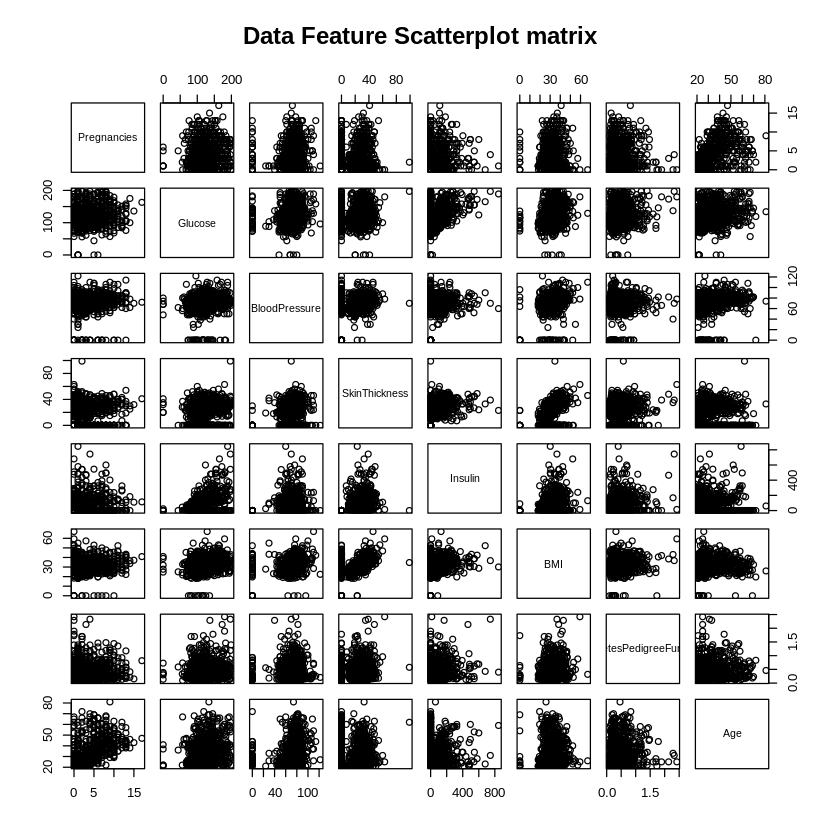

In [28]:
#::GMG::pair plot to see correlations between pairs of features
#::NOTE::See also:
# https://www.statmethods.net/advgraphs/trellis.html
# https://www.statmethods.net/graphs/scatterplot.html
# https://www.statmethods.net/advgraphs/layout.html
# https://www.r-bloggers.com/scatterplot-matrices-pair-plots-with-cdata-and-ggplot2/
pairs(pima[1:8], pch = 21, main = 'Data Feature Scatterplot matrix')

## Train/Test Split

## Models

### knn

### decision tree

### logit

### random forest

### gradient boosting